# Table of Contents
1. [Reading the Training variants data](#readvar) <br>
2. [Reading the Training text data (Text contains medical literature)](#readtext) <br>
3. [Exploratory Data Analysis](#eda) <br>
4. [Pre-processing of Medical Text](#pre) <br>
5. [Splitting the data into Train and Test](#tts) <br>
6. [Encoding Medical Text](#enc) <br>
   6.1. [Bag of Words Encoding](#bow) <br>
   6.2. [TFIDF Encoding](#tfidf) <br>
7. [One Hot Encoding of Categorical features](#ohe) <br>
   7.1. [One Hot Encoding of GENE feature](#ohegene) <br>
   7.2. [One Hot Encoding of VARIATION feature](#ohevar) <br>
8. [Concatenating all features](#concat) <br>
   8.1. [Concatenating for Bag of Words](#concatbow) <br>
   8.2. [Concatenating for TF-IDF](#concattfidf) <br>
9. <b>[Applying Naive Bayes](#nb) </b><br>
   9.1. [Set-1: preprocessed_medical_text (BoW) + categorical feature (GENE) + categorical feature (VARIATION)](#nbset1)<br>
   9.2. [Set-2: preprocessed_medical_text (TFIDF) + categorical feature (GENE) + categorical feature (VARIATION)](#nbset2)<br>
10. <b>[Applying k-NN](#k-NN)</b> <br>
    10.1. [Set-1: preprocessed_medical_text (BoW) + categorical feature (GENE) + categorical feature (VARIATION)](#knnset1)<br>
    10.2. [Set-2: preprocessed_medical_text (TFIDF) + categorical feature (GENE) + categorical feature (VARIATION)](#knnset1)<br>
11. <b>[Applying Logistic Regression](#lr)</b> <br>
    11.1. [Set-1: preprocessed_medical_text (BoW) + categorical feature (GENE) + categorical feature (VARIATION)](#lrset1)<br>
    11.2. [Set-2: preprocessed_medical_text (TFIDF) + categorical feature (GENE) + categorical feature (VARIATION)](#lrset2)<br>
12. <b>[Applying Random Forest](#rf)</b> <br>
    12.1. [Set-1: preprocessed_medical_text (BoW) + categorical feature (GENE) + categorical feature (VARIATION)](#rfset1)<br>
    12.2. [Set-2: preprocessed_medical_text (TFIDF) + categorical feature (GENE) + categorical feature (VARIATION)](#rfset2)<br>
13. <b>[Conclusion](#con)<b>

**Notes**:

Once a patient seems to have some form of cancer. They take the tumor, they sequence the cancer tumor (genetic sequencing) -> you get the gene mutations. Mutation is basically small changes in the gene which can corrupt the genetic code causing cancer. NOT ALL MUTATION CAUSE CANCER.

**Genetic Variation** = gene (categorical random variable) + variation (categorical random variable) that happens on a gene

**Steps**:
    
1. Molecular Pathologists select a gene and a variation.
2. Collect all the research work (Medical literature) that has ever been done on that perticular gene and its variation.
3. MP (Domain Expert) spends huge amount of text reading the text -> Then they finally determine which class this gene and variation belong to. 

**(Step3 : This is the most time consuming part)**
    

- We have two data files: one contains the information about the genetic mutations and the other contains the clinical evidence (text) that human experts/pathologists use to classify the genetic mutations.
- Both these data files are have a common column called ID
- Data file's information:
 - training_variants (ID , Gene, Variations, Class)
 - training_text (ID, Text)

In [1]:
#importing the usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reading the Training variants data

<a id='readvar'></a>

In [2]:
data_train_var = pd.read_csv('Dataset/training_variants')

#saving the dataframe 
data_train_var.to_csv('training_variants.csv') 

In [3]:
print('Shape of training variants: ', data_train_var.shape)
print('No. of rows in Training variants: ', data_train_var.shape[0])
print('No. of columns in Training variants: ', data_train_var.shape[1])

Shape of training variants:  (3321, 4)
No. of rows in Training variants:  3321
No. of columns in Training variants:  4


In [4]:
print('Features of the dataset include: ', data_train_var.columns.values)

Features of the dataset include:  ['ID' 'Gene' 'Variation' 'Class']


In [5]:
#printing the top 10 rows
data_train_var.head(10)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
5,5,CBL,V391I,4
6,6,CBL,V430M,5
7,7,CBL,Deletion,1
8,8,CBL,Y371H,4
9,9,CBL,C384R,4


# 2. Reading the Training text data (Text contains medical literature)

<a id='readtext'></a>

In [6]:
#sep = '\|\|' ->
#If you look at the OG train_text file. The separator is not , (as it should be)
#It is ||. 
#EG: ID||Text

data_train_text = pd.read_csv('Dataset/training_text', sep="\|\|", engine='python', names=["ID","Text"], skiprows=1)

#saving the dataframe 
data_train_text.to_csv('training_text.csv') 

In [7]:
print('Shape of training text: ', data_train_text.shape)
print('No. of rows in Training text: ', data_train_text.shape[0])
print('No. of columns in Training text: ', data_train_text.shape[1])

Shape of training text:  (3321, 2)
No. of rows in Training text:  3321
No. of columns in Training text:  2


In [8]:
print('Features of the dataset include: ', data_train_text.columns.values)

Features of the dataset include:  ['ID' 'Text']


In [9]:
#printing the top 10 rows
data_train_text.head(10)

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...
5,5,Oncogenic mutations in the monomeric Casitas B...
6,6,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL is a negative regulator of activated recep...
8,8,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,Abstract Juvenile myelomonocytic leukemia (JM...


In [10]:
#https://datacarpentry.org/python-socialsci/11-joins/index.html

final_df = df_cd = pd.merge(data_train_var, data_train_text, how='inner', on = 'ID')
final_df.head(10)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...
6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...
8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...


In [11]:
#Rearranging the dataframe
final_df = final_df.reindex(columns=['ID', 'Gene', 'Variation', 'Text', 'Class'])

 <img src="9Classes.png">
 
reference: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35810

In [12]:
#Replacing the integer classes with the actual classes.
final_df['Class'].replace(1, 'Likely Loss-of-function', inplace=True)
final_df['Class'].replace(2, 'Likely Gain-of-function', inplace=True)
final_df['Class'].replace(3, 'Neutral', inplace=True)
final_df['Class'].replace(4, 'Loss-of-function', inplace=True)
final_df['Class'].replace(5, 'Likely Neutral', inplace=True)
final_df['Class'].replace(6, 'Inconclusive', inplace=True)
final_df['Class'].replace(7, 'Gain-of-function', inplace=True)
final_df['Class'].replace(8, 'Likely Switch-of-function', inplace=True)
final_df['Class'].replace(9, 'Switch-of-function', inplace=True)

In [13]:
#Final data frame after merging
final_df.head(10)

,ID,Gene,Variation,Text,Class
0,0,FAM58A,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,Likely Loss-of-function
1,1,CBL,W802*,Abstract Background Non-small cell lung canc...,Likely Gain-of-function
2,2,CBL,Q249E,Abstract Background Non-small cell lung canc...,Likely Gain-of-function
3,3,CBL,N454D,Recent evidence has demonstrated that acquired...,Neutral
4,4,CBL,L399V,Oncogenic mutations in the monomeric Casitas B...,Loss-of-function
5,5,CBL,V391I,Oncogenic mutations in the monomeric Casitas B...,Loss-of-function
6,6,CBL,V430M,Oncogenic mutations in the monomeric Casitas B...,Likely Neutral
7,7,CBL,Deletion,CBL is a negative regulator of activated recep...,Likely Loss-of-function
8,8,CBL,Y371H,Abstract Juvenile myelomonocytic leukemia (JM...,Loss-of-function
9,9,CBL,C384R,Abstract Juvenile myelomonocytic leukemia (JM...,Loss-of-function


In [14]:
#saving the final training dataframe 
final_df.to_csv('training_FINAL.csv') 

# 3. Exploratory Data Analysis using Pandas Profiling

<a id='eda'></a>

In [15]:
#https://towardsdatascience.com/a-better-eda-with-pandas-profiling-e842a00e1136
#Using Pandas profiling for better EDA

#importing the pandas_profiling
import pandas_profiling
profile = final_df.profile_report(title='Pandas Profiling Report for Gene Classification', style={'full_width':True})
#profile.to_file(output_file="Gene_pandas_profiling.html")

# 4. Pre-processing of Medical Text

<a id='pre'></a>

In [16]:
from nltk.corpus import stopwords

# loading stop words from nltk library
stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        final_df[column][index] = string

In [17]:
import time
import re
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

for index, row in tqdm(final_df.iterrows()):
    if type(row['Text']) is str:
        nlp_preprocessing(row['Text'], index, 'Text')
    else:
        print("There is no text description for ID:", index)

1109it [02:40,  7.91it/s]

There is no text description for ID: 1109


1277it [03:05,  6.50it/s]

There is no text description for ID: 1277


1407it [03:26,  6.66it/s]

There is no text description for ID: 1407


1639it [04:04,  5.69it/s]

There is no text description for ID: 1639


2755it [07:09,  5.43it/s]

There is no text description for ID: 2755


3321it [08:42,  6.36it/s]


In [18]:
final_df.head(10)

,ID,Gene,Variation,Text,Class
0,0,FAM58A,Truncating Mutations,cyclin dependent kinases cdks regulate variety...,Likely Loss-of-function
1,1,CBL,W802*,abstract background non small cell lung cancer...,Likely Gain-of-function
2,2,CBL,Q249E,abstract background non small cell lung cancer...,Likely Gain-of-function
3,3,CBL,N454D,recent evidence demonstrated acquired uniparen...,Neutral
4,4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...,Loss-of-function
5,5,CBL,V391I,oncogenic mutations monomeric casitas b lineag...,Loss-of-function
6,6,CBL,V430M,oncogenic mutations monomeric casitas b lineag...,Likely Neutral
7,7,CBL,Deletion,cbl negative regulator activated receptor tyro...,Likely Loss-of-function
8,8,CBL,Y371H,abstract juvenile myelomonocytic leukemia jmml...,Loss-of-function
9,9,CBL,C384R,abstract juvenile myelomonocytic leukemia jmml...,Loss-of-function


In [19]:
#Checking if there are any null values
final_df[final_df.isnull().any(axis=1)]

,ID,Gene,Variation,Text,Class
1109,1109,FANCA,S1088F,NaN,Likely Loss-of-function
1277,1277,ARID5B,Truncating Mutations,NaN,Likely Loss-of-function
1407,1407,FGFR3,K508M,NaN,Inconclusive
1639,1639,FLT1,Amplification,NaN,Inconclusive
2755,2755,BRAF,G596C,NaN,Gain-of-function


In [20]:
#Dropping the rows with Null values.
final_df.drop([1109, 1277, 1407, 1639, 2755], inplace=True)

In [21]:
y = final_df['Class']
#final_df.drop(['Class'], axis=1, inplace=True)
X = final_df

#final shape of matrix
print(X.shape)

(3316, 5)


In [25]:
X.to_csv('For_deployment.csv')

# 5. Splitting the data into Train and test set.

<a id='tts'></a>

In [22]:
# train test split before vectorizing or performing any feature engineering techniques
#as doing it before leads to data leakage.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# 6. Encoding of Medical Text
<a id='enc'></a>

### 6.1 Bag of Words Encoding 

<a id='bow'></a>

In [23]:
%%time

#BoW for medical text.
print('Before Bag of Words: ')
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_medical_text = CountVectorizer(min_df=10)
vectorizer_medical_text.fit(X_train['Text'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_medical_text_bow = vectorizer_medical_text.transform(X_train['Text'].values)
X_test_medical_text_bow = vectorizer_medical_text.transform(X_test['Text'].values)

print("After encoding using Bag of Words: ")
print(X_train_medical_text_bow.shape, y_train.shape)
print(X_test_medical_text_bow.shape, y_test.shape)

Before Bag of Words: 
(2652, 4) (2652,)
(664, 4) (664,)
After encoding using Bag of Words: 
(2652, 29277) (2652,)
(664, 29277) (664,)
Wall time: 51.9 s


### 6.2. TF-IDF Encoding 

<a id='tfidf'></a>

In [24]:
%%time

#TFIDF for medical text.
print('Before TFIDF: ')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

#TF-IDF Encoding on medical text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_medical_text_tfidf = TfidfVectorizer(min_df=10)
    vectorizer_medical_text_tfidf.fit(X_train['Text'].values) #fit has to happen only on train data

#We use the fitted CountVectorizer to convert the text to vector
X_train_medical_text_tfidf = vectorizer_medical_text_tfidf.transform(X_train['Text'].values)
X_test_medical_text_tfidf = vectorizer_medical_text_tfidf.transform(X_test['Text'].values)

print("After encoding using TFIDF: ")
print(X_train_medical_text_tfidf.shape, y_train.shape)
print(X_test_medical_text_tfidf.shape, y_test.shape)

Before TFIDF: 
(2652, 4) (2652,)
(664, 4) (664,)
After encoding using TFIDF: 
(2652, 29277) (2652,)
(664, 29277) (664,)
Wall time: 50.6 s


# 7. One Hot Encoding of Categorical Features.

<a id='ohe'></a>

### 7.1 One Hot Encoding of GENE feature.

<a id='ohegene'></a>

In [25]:
#One-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer(binary=True)

X_train_gene_ohe = gene_vectorizer.fit_transform(X_train['Gene'])
X_test_gene_ohe = gene_vectorizer.transform(X_test['Gene'])

print("After One-Hot-Encoding of Gene Feature: ")
print(X_train_gene_ohe.shape, y_train.shape)
print(X_test_gene_ohe.shape, y_test.shape)
print(gene_vectorizer.get_feature_names())
print("="*100)

After One-Hot-Encoding of Gene Feature: 
(2652, 248) (2652,)
(664, 248) (664,)
['abl1', 'acvr1', 'ago2', 'akt1', 'akt2', 'akt3', 'alk', 'apc', 'ar', 'araf', 'arid1a', 'arid1b', 'arid2', 'asxl1', 'asxl2', 'atm', 'atr', 'atrx', 'aurka', 'aurkb', 'axin1', 'axl', 'b2m', 'bap1', 'bard1', 'bcl10', 'bcl2l11', 'bcor', 'braf', 'brca1', 'brca2', 'brd4', 'brip1', 'btk', 'card11', 'carm1', 'casp8', 'cbl', 'ccnd1', 'ccnd3', 'ccne1', 'cdh1', 'cdk12', 'cdk4', 'cdk6', 'cdk8', 'cdkn1a', 'cdkn1b', 'cdkn2a', 'cdkn2b', 'cebpa', 'chek2', 'cic', 'crebbp', 'ctcf', 'ctnnb1', 'ddr2', 'dicer1', 'dnmt3a', 'dnmt3b', 'dusp4', 'egfr', 'eif1ax', 'elf3', 'ep300', 'epas1', 'epcam', 'erbb2', 'erbb3', 'erbb4', 'ercc2', 'ercc3', 'ercc4', 'erg', 'errfi1', 'esr1', 'etv1', 'etv6', 'ewsr1', 'ezh2', 'fam58a', 'fanca', 'fat1', 'fbxw7', 'fgf19', 'fgf3', 'fgf4', 'fgfr1', 'fgfr2', 'fgfr3', 'fgfr4', 'flt3', 'foxa1', 'foxl2', 'foxo1', 'foxp1', 'gata3', 'gli1', 'gna11', 'gnaq', 'gnas', 'h3f3a', 'hist1h1c', 'hla', 'hnf1a', 'hras', 'i

### 7.2 One Hot Encoding of VARIATION feature.

<a id='ohevar'></a>

In [26]:
#One-hot encoding of Gene feature.
variation_vectorizer = CountVectorizer(binary=True)

X_train_variation_ohe = variation_vectorizer.fit_transform(X_train['Variation'])
X_test_variation_ohe = variation_vectorizer.transform(X_test['Variation'])

print("After One-Hot-Encoding of Gene Feature: ")
print(X_train_variation_ohe.shape, y_train.shape)
print(X_test_variation_ohe.shape, y_test.shape)
print(variation_vectorizer.get_feature_names())
print("="*100)

After One-Hot-Encoding of Gene Feature: 
(2652, 2430) (2652,)
(664, 2430) (664,)
['11', '126', '13', '17', '19', '1_2009trunc', '20', '2010_2471trunc', '256_286trunc', '385_418del', '422_605trunc', '51', '533_534del', '550_592del', '560_561inser', '596_619splice', '6a', '963_d1010splice', 'a1065t', 'a1066v', 'a1099t', 'a111p', 'a1131t', 'a113_splice', 'a1170v', 'a11_g12insga', 'a1200v', 'a120s', 'a121p', 'a121v', 'a122', 'a1234t', 'a126d', 'a126g', 'a126s', 'a1374v', 'a1459p', 'a146t', 'a146v', 'a149p', 'a1519t', 'a151t', 'a159t', 'a161s', 'a161t', 'a1685s', 'a1708e', 'a1708v', 'a1752p', 'a1752v', 'a1789t', 'a1823t', 'a1830t', 'a1843t', 'a197t', 'a19v', 'a205t', 'a209t', 'a211d', 'a232v', 'a2351g', 'a23e', 'a2425t', 'a246p', 'a263v', 'a2717s', 'a272v', 'a2770t', 'a298t', 'a339v', 'a347t', 'a34d', 'a36p', 'a389t', 'a391e', 'a39p', 'a41p', 'a41t', 'a4419s', 'a459v', 'a502_y503dup', 'a504_y505ins', 'a530t', 'a530v', 'a532h', 'a546d', 'a57v', 'a598t', 'a598v', 'a60v', 'a614d', 'a617t', 'a6

# 8. Concatenating All Features.

<a id='concat'></a>

### 8.1. Concatenating for Bag of Words.

<a id='concatbow'></a>

In [27]:
from scipy.sparse import hstack

X_train_bow = hstack((X_train_medical_text_bow, X_train_gene_ohe, X_train_variation_ohe)).tocsr()
X_test_bow = hstack((X_test_medical_text_bow, X_test_gene_ohe, X_test_variation_ohe)).tocsr()

print("Final Data matrix which will be used as input to all algorithms: ")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

Final Data matrix which will be used as input to all algorithms: 
(2652, 31955) (2652,)
(664, 31955) (664,)


### 8.2. Concatenating for TF-IDF.

<a id='concattfidf'></a>

In [28]:
X_train_tfidf = hstack((X_train_medical_text_tfidf, X_train_gene_ohe, X_train_variation_ohe)).tocsr()
X_test_tfidf = hstack((X_test_medical_text_tfidf, X_test_gene_ohe, X_test_variation_ohe)).tocsr()

print("Final Data matrix which will be used as input to all algorithms: ")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix which will be used as input to all algorithms: 
(2652, 31955) (2652,)
(664, 31955) (664,)


# 9. Applying Naive Bayes

<a id='nb'></a>

## 9.1. Set-1: preprocessed_medical_text (BoW) + categorical feature (GENE) + categorical feature (VARIATION)

<a id='nbset1'></a>

### 9.1.1. Training the matrix with different hyper-parameters.

<a id='nbtrain'></a>

In [58]:
%%time

from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]

test_log_error_array = []

print('***Logloss while training with Naive Bayes*** \n')
print('*** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')

for i in alpha:
    print("For alpha =", i)
    model = MultinomialNB(alpha=i)
    model.fit(X_train_bow, y_train)
    
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    
    sig_clf_probs = sig_clf.predict_proba(X_test_bow)
    
    test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=model.classes_))
    
    print("Log Loss :", log_loss(y_test, sig_clf_probs)) 

***Logloss while training with Naive Bayes*** 

*** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

For alpha = 1e-05
Log Loss : 1.2636815276040476
For alpha = 0.0001
Log Loss : 1.264328859870972
For alpha = 0.001
Log Loss : 1.2733282236016814
For alpha = 0.1
Log Loss : 1.2923463745174795
For alpha = 1
Log Loss : 1.291511406209013
For alpha = 10
Log Loss : 1.3155539560903213
For alpha = 100
Log Loss : 1.630899190698445
For alpha = 1000
Log Loss : 1.770077966676224
Wall time: 16.7 s


### 9.1.2. Testing the matrix with the best hyper-parameter.

<a id='nbtest'></a>

In [81]:
%%time

best_alpha = 0.00001

clf = MultinomialNB(alpha=best_alpha)
clf.fit(X_train_bow, y_train)
sig_clf_test = CalibratedClassifierCV(clf, method="sigmoid")

sig_clf_test.fit(X_train_bow, y_train)
sig_clf_probs = sig_clf.predict_proba(X_test_bow)

print('***Logloss while testing with Naive Bayes*** \n')
print('*** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')
print("Log Loss :",log_loss(y_test, sig_clf_probs))

***Logloss while testing with Naive Bayes*** 

*** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

Log Loss : 1.770077966676224
Wall time: 1.87 s


In [74]:
print('*** Set 1 of Naive Bayes (Bag-of-Words Encoding of Medical Text)*** \n')
print('***Analyzing the acutal and predicted class by taking a test datapoint*** \n')

test_datapoint_index = 210
predicted_cls = sig_clf_test.predict(X_test_bow[test_datapoint_index])

print("Predicted Class :", predicted_cls[0])

#flatten because it gave a 2D array. Needs to be converted to 1D
predicted_prob = sig_clf_test.predict_proba(X_test_bow[test_datapoint_index]).flatten()

print("Predicted Class Probabilities:", predicted_prob)
print("Actual Class :", y_test[test_datapoint_index])

print('*'*50)
      
print(model.classes_[0], predicted_prob[0])
print(model.classes_[1], predicted_prob[1])
print(model.classes_[2], predicted_prob[2])
print(model.classes_[3], predicted_prob[3])
print(model.classes_[4], predicted_prob[4])
print(model.classes_[5], predicted_prob[5])
print(model.classes_[6], predicted_prob[6])
print(model.classes_[7], predicted_prob[7])
print(model.classes_[8], predicted_prob[8])

*** Set 1 of Naive Bayes (Bag-of-Words Encoding of Medical Text)*** 

***Analyzing the acutal and predicted class by taking a test datapoint*** 

Predicted Class : Gain-of-function
Predicted Class Probabilities: [0.61522791 0.03814413 0.0837725  0.08099966 0.03923457 0.00544302
 0.12026088 0.01419579 0.00272154]
Actual Class : Gain-of-function
**************************************************
Gain-of-function 0.615227906815719
Inconclusive 0.03814413038824605
Likely Gain-of-function 0.0837724962346252
Likely Loss-of-function 0.08099966344887025
Likely Neutral 0.03923457215181567
Likely Switch-of-function 0.005443020782834237
Loss-of-function 0.1202608764220242
Neutral 0.014195790219329055
Switch-of-function 0.0027215435365362203


In [96]:
model.classes_

array(['Gain-of-function', 'Inconclusive', 'Likely Gain-of-function',
       'Likely Loss-of-function', 'Likely Neutral',
       'Likely Switch-of-function', 'Loss-of-function', 'Neutral',
       'Switch-of-function'], dtype='<U25')

		 Classification Report for Naive Bayes 

		 *** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

                           precision    recall  f1-score   support

         Gain-of-function       0.69      0.76      0.73       207
             Inconclusive       0.79      0.56      0.65        54
  Likely Gain-of-function       0.55      0.65      0.59        93
  Likely Loss-of-function       0.52      0.61      0.56       107
           Likely Neutral       0.44      0.46      0.45        52
Likely Switch-of-function       0.00      0.00      0.00         2
         Loss-of-function       0.78      0.50      0.61       123
                  Neutral       0.55      0.63      0.59        19
       Switch-of-function       0.60      0.86      0.71         7

                 accuracy                           0.63       664
                macro avg       0.55      0.56      0.54       664
             weighted avg       0.64      0.63      0.63       664



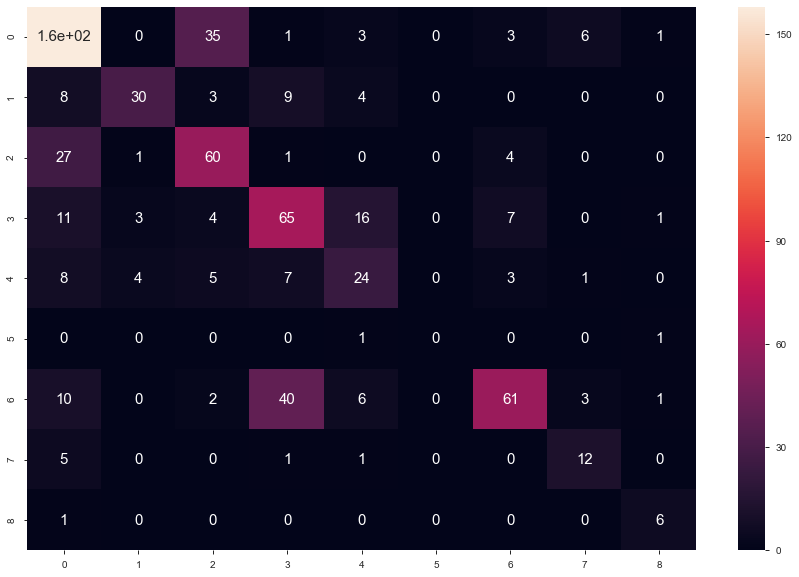

In [99]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print('\t\t Classification Report for Naive Bayes \n')
print('\t\t *** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')

y_predicted = sig_clf_test.predict(X_test_bow)

#lets make a confusion matrix to view our real data (y_test) and predicted data (y_predicted)
cm = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(cm, annot = True, ax=ax, annot_kws={"size": 15})

#lets make a classification report.
print(classification_report(y_test, y_predicted))

## 9.2. Set-2: preprocessed_medical_text (TFIDF) + categorical feature (GENE) + categorical feature (VARIATION)

<a id='nbset2'></a>

In [86]:
%%time

from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]

test_log_error_array = []

print('***Logloss while training with Naive Bayes*** \n')
print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')

for i in alpha:
    print("For alpha =", i)
    model = MultinomialNB(alpha=i)
    model.fit(X_train_tfidf, y_train)
    
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    
    sig_clf_probs = sig_clf.predict_proba(X_test_tfidf)
    
    test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=model.classes_))
    
    print("Log Loss :", log_loss(y_test, sig_clf_probs)) 

***Logloss while training with Naive Bayes*** 

*** Set 2 (TFIDF Encoding of Medical Text)*** 

For alpha = 1e-05
Log Loss : 1.118747587590264
For alpha = 0.0001
Log Loss : 1.122834489762822
For alpha = 0.001
Log Loss : 1.1284500497177294
For alpha = 0.1
Log Loss : 1.1345079422946664
For alpha = 1
Log Loss : 1.1827817967191778
For alpha = 10
Log Loss : 1.205266175722701
For alpha = 100
Log Loss : 1.236161575057107
For alpha = 1000
Log Loss : 1.2447331701087276
Wall time: 14.2 s


In [87]:
%%time

best_alpha = 0.00001

clf = MultinomialNB(alpha=best_alpha)
clf.fit(X_train_tfidf, y_train)

sig_clf_test = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf_test.fit(X_train_bow, y_train)
sig_clf_probs = sig_clf.predict_proba(X_test_tfidf)

print('***Logloss while testing with Naive Bayes*** \n')
print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')
print("Log Loss :",log_loss(y_test, sig_clf_probs))

***Logloss while testing with Naive Bayes*** 

*** Set 2 (TFIDF Encoding of Medical Text)*** 

Log Loss : 1.2447331701087276
Wall time: 1.85 s


In [94]:
print('*** Set 2 of Naive Bayes (TFIDF Encoding of Medical Text)*** \n')
print('***Analyzing the acutal and predicted class by taking a test datapoint*** \n')

test_datapoint_index = 303
predicted_cls = sig_clf_test.predict(X_test_tfidf[test_datapoint_index])

print("Predicted Class :", predicted_cls[0])

#flatten because it gave a 2D array. Needs to be converted to 1D
predicted_prob = sig_clf_test.predict_proba(X_test_tfidf[test_datapoint_index]).flatten()

print("Predicted Class Probabilities:", predicted_prob)
print("Actual Class :", y_test[test_datapoint_index])

print('*'*50)

print(model.classes_[0], predicted_prob[0])
print(model.classes_[1], predicted_prob[1])
print(model.classes_[2], predicted_prob[2])
print(model.classes_[3], predicted_prob[3])
print(model.classes_[4], predicted_prob[4])
print(model.classes_[5], predicted_prob[5])
print(model.classes_[6], predicted_prob[6])
print(model.classes_[7], predicted_prob[7])
print(model.classes_[8], predicted_prob[8])

*** Set 2 of Naive Bayes (TFIDF Encoding of Medical Text)*** 

***Analyzing the acutal and predicted class by taking a test datapoint*** 

Predicted Class : Gain-of-function
Predicted Class Probabilities: [0.45763311 0.03970984 0.08927002 0.11417961 0.04126393 0.00576789
 0.23463216 0.01462868 0.00291476]
Actual Class : Neutral
**************************************************
Gain-of-function 0.4576331098860556
Inconclusive 0.039709841895300475
Likely Gain-of-function 0.08927002410838303
Likely Loss-of-function 0.11417961049059268
Likely Neutral 0.04126392660374185
Likely Switch-of-function 0.005767891284596211
Loss-of-function 0.2346321618572992
Neutral 0.014628677829140381
Switch-of-function 0.0029147560448904886


		 Classification Report for Naive Bayes 

		 *** Set 2 (TFIDF Encoding of Medical Text)*** 

                           precision    recall  f1-score   support

         Gain-of-function       0.69      0.84      0.76       207
             Inconclusive       0.73      0.59      0.65        54
  Likely Gain-of-function       0.59      0.46      0.52        93
  Likely Loss-of-function       0.58      0.66      0.62       107
           Likely Neutral       0.46      0.42      0.44        52
Likely Switch-of-function       0.00      0.00      0.00         2
         Loss-of-function       0.76      0.59      0.67       123
                  Neutral       0.60      0.63      0.62        19
       Switch-of-function       0.67      0.86      0.75         7

                 accuracy                           0.65       664
                macro avg       0.56      0.56      0.56       664
             weighted avg       0.65      0.65      0.65       664



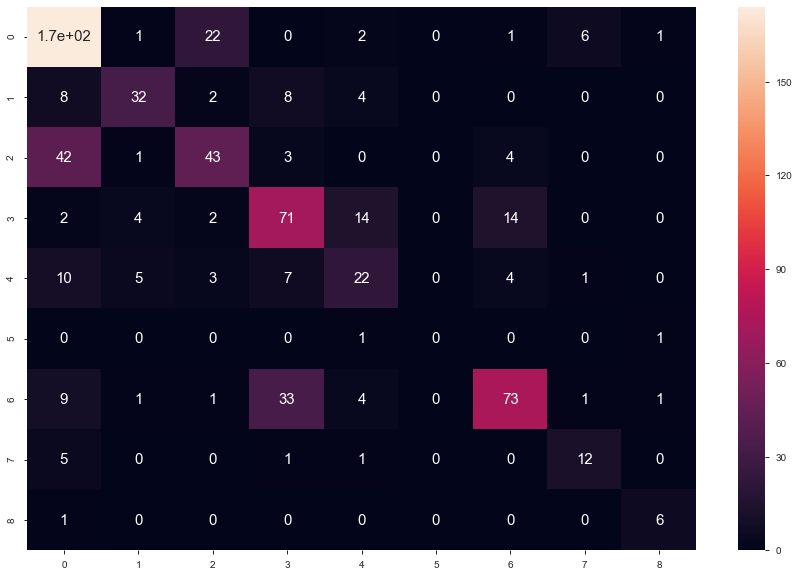

In [95]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print('\t\t Classification Report for Naive Bayes \n')
print('\t\t *** Set 2 (TFIDF Encoding of Medical Text)*** \n')

y_predicted = sig_clf_test.predict(X_test_tfidf)

#lets make a confusion matrix to view our real data (y_test) and predicted data (y_predicted)
cm = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot = True, ax=ax, annot_kws={"size": 15})

#lets make a classification report.
print(classification_report(y_test, y_predicted))

# 10. Applying k-NN

<a id='k-NN'></a>

## 10.1. Set-1: preprocessed_medical_text (BoW) + categorical feature (GENE) + categorical feature (VARIATION)

<a id='knnset1'></a>

In [30]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

print('***Logloss while training with k Nearest Neighbors*** \n')
print('*** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')

k = [13, 17, 29, 37, 47] #Choosing only odd numbers as even 'K' will lead to complications.

test_log_error_array = []

for i in k:
    print("For 'K' =", i)
    model_knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    model_knn.fit(X_train_bow, y_train)
    
    cal_clf = CalibratedClassifierCV(model_knn, method="sigmoid")
    cal_clf.fit(X_train_bow, y_train)
    
    cal_clf_probs = cal_clf.predict_proba(X_test_bow)
    
    test_log_error_array.append(log_loss(y_test, cal_clf_probs, labels=model_knn.classes_))
    
    print("Log Loss :", log_loss(y_test, cal_clf_probs)) 

***Logloss while training with k Nearest Neighbors*** 

*** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

For 'K' = 13
Log Loss : 1.2190924050564056
For 'K' = 17
Log Loss : 1.2505219244477221
For 'K' = 29
Log Loss : 1.2913143074205105
For 'K' = 37
Log Loss : 1.3050379736479405
For 'K' = 47
Log Loss : 1.320917110029617
Wall time: 1min 36s


In [31]:
%%time

best_k = 13

clf_knn_bow = KNeighborsClassifier(n_neighbors=best_k)
clf_knn_bow.fit(X_train_bow, y_train)

cal_clf_bow_test = CalibratedClassifierCV(clf_knn_bow, method="sigmoid")
cal_clf_bow_test.fit(X_train_bow, y_train)
cal_clf_knn_bow_probs = clf_knn_bow.predict_proba(X_test_bow)

print('***Logloss while testing with k-Nearest Neighbors*** \n')
print('*** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')

print("Log Loss :", log_loss(y_test, cal_clf_knn_bow_probs))

***Logloss while testing with k-Nearest Neighbors*** 

*** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

Log Loss : 2.8915741140910556
Wall time: 15.7 s


In [43]:
print('*** Set 1 of k-NN (Bag-of_Words Encoding of Medical Text)*** \n')
print('***Analyzing the acutal and predicted class by taking a test datapoint*** \n')

test_datapoint_index = 310
predicted_cls = cal_clf_bow_test.predict(X_test_bow[test_datapoint_index])

print("Predicted Class :", predicted_cls[0])

#flatten because it gave a 2D array. Needs to be converted to 1D
predicted_prob = cal_clf_bow_test.predict_proba(X_test_bow[test_datapoint_index]).flatten()

print("Predicted Class Probabilities:", predicted_prob)
print("Actual Class :", y_test[test_datapoint_index])

print('*'*50)

print(model_knn.classes_[0], predicted_prob[0])
print(model_knn.classes_[1], predicted_prob[1])
print(model_knn.classes_[2], predicted_prob[2])
print(model_knn.classes_[3], predicted_prob[3])
print(model_knn.classes_[4], predicted_prob[4])
print(model_knn.classes_[5], predicted_prob[5])
print(model_knn.classes_[6], predicted_prob[6])
print(model_knn.classes_[7], predicted_prob[7])
print(model_knn.classes_[8], predicted_prob[8])

*** Set 1 of k-NN (Bag-of_Words Encoding of Medical Text)*** 

***Analyzing the acutal and predicted class by taking a test datapoint*** 

Predicted Class : Likely Gain-of-function
Predicted Class Probabilities: [0.06858526 0.02647543 0.71957194 0.09196994 0.0275223  0.00392347
 0.0460976  0.01138701 0.00446706]
Actual Class : Likely Loss-of-function
**************************************************
Gain-of-function 0.06858526340828833
Inconclusive 0.02647543339758644
Likely Gain-of-function 0.7195719360407136
Likely Loss-of-function 0.0919699354227223
Likely Neutral 0.027522295165895726
Likely Switch-of-function 0.003923466312683856
Loss-of-function 0.04609760178590852
Neutral 0.01138701332133985
Switch-of-function 0.004467055144861439


		 Classification Report for k-NN 

		 *** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

                           precision    recall  f1-score   support

         Gain-of-function       0.61      0.83      0.70       192
             Inconclusive       0.72      0.60      0.65        52
  Likely Gain-of-function       0.69      0.32      0.44        84
  Likely Loss-of-function       0.56      0.48      0.52       121
           Likely Neutral       0.64      0.26      0.37        62
Likely Switch-of-function       0.00      0.00      0.00         2
         Loss-of-function       0.51      0.70      0.59       136
                  Neutral       0.00      0.00      0.00        10
       Switch-of-function       0.67      0.40      0.50         5

                 accuracy                           0.58       664
                macro avg       0.49      0.40      0.42       664
             weighted avg       0.59      0.58      0.56       664



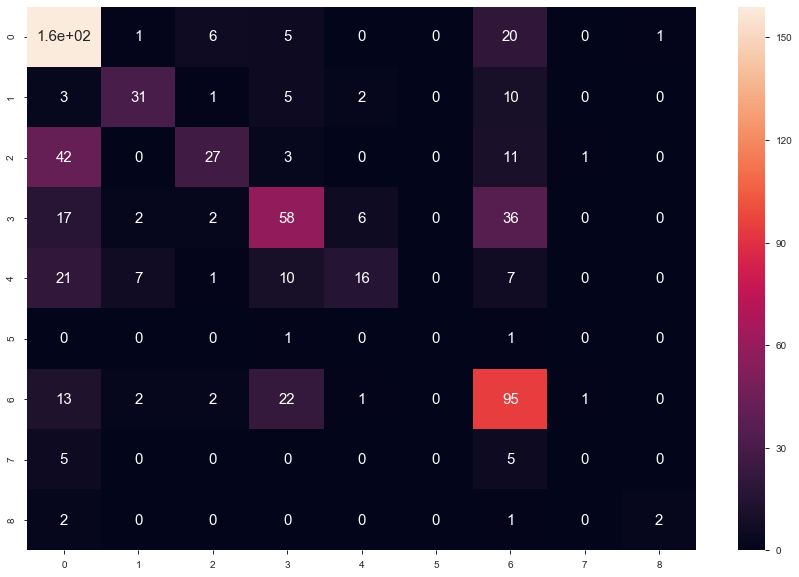

In [44]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print('\t\t Classification Report for k-NN \n')
print('\t\t *** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')

y_predicted = cal_clf_bow_test.predict(X_test_bow)

#lets make a confusion matrix to view our real data (y_test) and predicted data (y_predicted)
cm = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot = True, ax=ax, annot_kws={"size": 15})

#lets make a classification report.
print(classification_report(y_test, y_predicted))

## 10.2. Set-2: preprocessed_medical_text (TFIDF) + categorical feature (GENE) + categorical feature (VARIATION)

<a id='knnset2'></a>

In [45]:
%%time

from sklearn.neighbors import KNeighborsClassifier

k = [13, 17, 29, 37, 47] #Choosing only odd numbers as even 'K' will lead to complications.

test_log_error_array = []

print('***Logloss while training with k Nearest Neighbors*** \n')
print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')

for i in k:
    print("For 'K' =", i)
    model_knn_tfidf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    model_knn_tfidf.fit(X_train_tfidf, y_train)
    
    cal_clf_tfidf = CalibratedClassifierCV(model_knn_tfidf, method="sigmoid")
    cal_clf_tfidf.fit(X_train_tfidf, y_train)
    
    cal_clf_tfidf_probs = cal_clf_tfidf.predict_proba(X_test_tfidf)
    
    test_log_error_array.append(log_loss(y_test, cal_clf_tfidf_probs, labels=model_knn_tfidf.classes_))
    
    print("Log Loss :", log_loss(y_test, cal_clf_tfidf_probs)) 

***Logloss while training with k Nearest Neighbors*** 

*** Set 2 (TFIDF Encoding of Medical Text)*** 

For 'K' = 13
Log Loss : 1.1205688816352393
For 'K' = 17
Log Loss : 1.1405692163140146
For 'K' = 29
Log Loss : 1.194734982248032
For 'K' = 37
Log Loss : 1.2097013492208486
For 'K' = 47
Log Loss : 1.223155576879969
Wall time: 1min 32s


In [46]:
%%time

best_k = 13

clf_knn_tfidf = KNeighborsClassifier(n_neighbors=best_k)
clf_knn_tfidf.fit(X_train_tfidf, y_train)

cal_clf_tfidf_test = CalibratedClassifierCV(clf_knn_tfidf, method="sigmoid")
cal_clf_tfidf_test.fit(X_train_tfidf, y_train)
cal_clf_knn_tfidf_probs = clf_knn_tfidf.predict_proba(X_test_tfidf)

print('***Logloss while testing with k-Nearest Neighbors*** \n')
print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')

print("Log Loss :", log_loss(y_test, cal_clf_knn_tfidf_probs))

***Logloss while testing with k-Nearest Neighbors*** 

*** Set 2 (TFIDF Encoding of Medical Text)*** 

Log Loss : 2.7601142513181354
Wall time: 14.2 s


In [61]:
test_datapoint_index = 230
predicted_cls = cal_clf_tfidf_test.predict(X_test_tfidf[test_datapoint_index])

print('*** Set 2 of k-NN (TFIDF Encoding of Medical Text)*** \n')
print('***Analyzing the acutal and predicted class by taking a test datapoint*** \n')

print("Predicted Class :", predicted_cls[0])

#flatten because it gave a 2D array. Needs to be converted to 1D
predicted_prob = cal_clf_tfidf_test.predict_proba(X_test_tfidf[test_datapoint_index]).flatten()

print("Predicted Class Probabilities:", predicted_prob)
print("Actual Class :", y_test[test_datapoint_index])

print('*'*50)

print(model_knn_tfidf.classes_[0], predicted_prob[0])
print(model_knn_tfidf.classes_[1], predicted_prob[1])
print(model_knn_tfidf.classes_[2], predicted_prob[2])
print(model_knn_tfidf.classes_[3], predicted_prob[3])
print(model_knn_tfidf.classes_[4], predicted_prob[4])
print(model_knn_tfidf.classes_[5], predicted_prob[5])
print(model_knn_tfidf.classes_[6], predicted_prob[6])
print(model_knn_tfidf.classes_[7], predicted_prob[7])
print(model_knn_tfidf.classes_[8], predicted_prob[8])

*** Set 2 of k-NN (TFIDF Encoding of Medical Text)*** 

***Analyzing the acutal and predicted class by taking a test datapoint*** 

Predicted Class : Likely Gain-of-function
Predicted Class Probabilities: [0.11772355 0.03906755 0.3617852  0.21607102 0.05200069 0.00437935
 0.18845    0.01632284 0.00419979]
Actual Class : Gain-of-function
**************************************************
Gain-of-function 0.11772355453831945
Inconclusive 0.039067550847669635
Likely Gain-of-function 0.36178519699982353
Likely Loss-of-function 0.2160710169707987
Likely Neutral 0.05200069485019982
Likely Switch-of-function 0.004379349161068535
Loss-of-function 0.1884500030983305
Neutral 0.016322843640684998
Switch-of-function 0.004199789893104812


		 Classification Report for k-NN 

		 *** Set 2 (Bag-of-Words Encoding of Medical Text)*** 

                           precision    recall  f1-score   support

         Gain-of-function       0.65      0.83      0.73       192
             Inconclusive       0.73      0.58      0.65        52
  Likely Gain-of-function       0.58      0.40      0.48        84
  Likely Loss-of-function       0.60      0.64      0.62       121
           Likely Neutral       0.63      0.19      0.30        62
Likely Switch-of-function       0.00      0.00      0.00         2
         Loss-of-function       0.62      0.73      0.67       136
                  Neutral       0.00      0.00      0.00        10
       Switch-of-function       0.67      0.40      0.50         5

                 accuracy                           0.62       664
                macro avg       0.50      0.42      0.44       664
             weighted avg       0.62      0.62      0.60       664



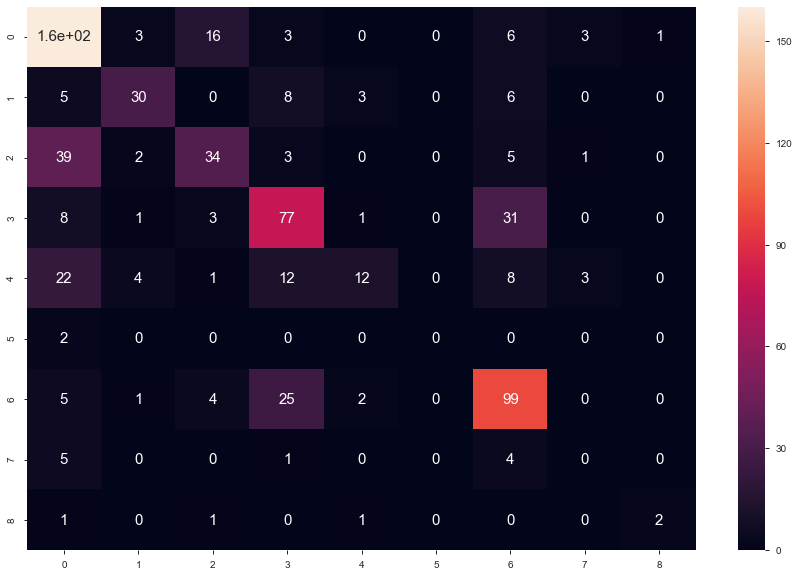

In [63]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

y_predicted = cal_clf_tfidf_test.predict(X_test_tfidf)

print('\t\t Classification Report for k-NN \n')
print('\t\t *** Set 2 (Bag-of-Words Encoding of Medical Text)*** \n')

#lets make a confusion matrix to view our real data (y_test) and predicted data (y_predicted)
cm = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot = True, ax=ax, annot_kws={"size": 15})

#lets make a classification report.
print(classification_report(y_test, y_predicted))

# 11. Applying Logistic Regression

<a id='lr'></a>

## 11.1. Set-1: preprocessed_medical_text (BoW) + categorical feature (GENE) + categorical feature (VARIATION)

<a id='lrset1'></a>

In [29]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

c = [0.001, 0.01, 0.1, 1, 10, 100] 

test_log_error_array = []

print('*** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')
print('***Logloss while training with Logistic Regression*** \n')

for i in c:
    print("For 'C' =", i)
    model_lr_bow = LogisticRegression(C=i, class_weight='balanced')
    model_lr_bow.fit(X_train_bow, y_train)
    
    cal_clf_bow = CalibratedClassifierCV(model_lr_bow)
    cal_clf_bow.fit(X_train_bow, y_train)
    
    cal_clf_bow_probs = cal_clf_bow.predict_proba(X_test_bow)
    
    test_log_error_array.append(log_loss(y_test, cal_clf_bow_probs, labels=model_lr_bow.classes_))
    
    print("Log Loss :", log_loss(y_test, cal_clf_bow_probs)) 

*** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

***Logloss while training with Logistic Regression*** 

For 'C' = 0.001
Log Loss : 1.1577578052247222
For 'C' = 0.01
Log Loss : 1.1847362825356154
For 'C' = 0.1
Log Loss : 1.2116043007008095
For 'C' = 1
Log Loss : 1.2328327447773448
For 'C' = 10
Log Loss : 1.2412445504573506
For 'C' = 100
Log Loss : 1.2428444930986149
Wall time: 1h 36min 52s


In [30]:
%%time

best_C = 0.001

clf_lr_bow = LogisticRegression(C=best_C, class_weight='balanced')
clf_lr_bow.fit(X_train_bow, y_train)

cal_clf_bow_test = CalibratedClassifierCV(clf_lr_bow)
cal_clf_bow_test.fit(X_train_bow, y_train)
cal_clf_lr_bow_probs = clf_lr_bow.predict_proba(X_test_bow)

print('*** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')
print('***Logloss while testing with Logistic Regression*** \n')

print("Log Loss :", log_loss(y_test, cal_clf_lr_bow_probs))

*** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

***Logloss while testing with Logistic Regression*** 

Log Loss : 1.371504663047994
Wall time: 2min 30s


In [66]:
print('*** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')
print('***Analyzing the acutal and predicted class by taking a test datapoint*** \n')

test_datapoint_index = 355
predicted_cls = cal_clf_bow_test.predict(X_test_bow[test_datapoint_index])

print("Predicted Class :", predicted_cls[0])

#flatten because it gave a 2D array. Needs to be converted to 1D
predicted_prob = cal_clf_bow_test.predict_proba(X_test_bow[test_datapoint_index]).flatten()

print("Predicted Class Probabilities:", predicted_prob)
print("Actual Class :", y_test[test_datapoint_index])

print('*'*50)

print(cal_clf_bow_test.classes_[0], predicted_prob[0])
print(cal_clf_bow_test.classes_[1], predicted_prob[1])
print(cal_clf_bow_test.classes_[2], predicted_prob[2])
print(cal_clf_bow_test.classes_[3], predicted_prob[3])
print(cal_clf_bow_test.classes_[4], predicted_prob[4])
print(cal_clf_bow_test.classes_[5], predicted_prob[5])
print(cal_clf_bow_test.classes_[6], predicted_prob[6])
print(cal_clf_bow_test.classes_[7], predicted_prob[7])
print(cal_clf_bow_test.classes_[8], predicted_prob[8])

*** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

***Analyzing the acutal and predicted class by taking a test datapoint*** 

Predicted Class : Loss-of-function
Predicted Class Probabilities: [6.00283722e-02 1.58439678e-04 8.86738846e-03 2.42635929e-01
 2.37846908e-03 3.87307055e-03 6.81421685e-01 5.67420066e-04
 6.92266705e-05]
Actual Class : Loss-of-function
**************************************************
Gain-of-function 0.06002837217581181
Inconclusive 0.00015843967813813461
Likely Gain-of-function 0.008867388463662184
Likely Loss-of-function 0.24263592855604732
Likely Neutral 0.002378469082668561
Likely Switch-of-function 0.0038730705531493715
Loss-of-function 0.6814216847535771
Neutral 0.0005674200664292015
Switch-of-function 6.92266705163083e-05


		 Classification Report for Logistic Regression 

		 *** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

                           precision    recall  f1-score   support

         Gain-of-function       0.64      0.82      0.72       192
             Inconclusive       0.69      0.48      0.57        60
  Likely Gain-of-function       0.54      0.39      0.45        90
  Likely Loss-of-function       0.56      0.63      0.59       122
           Likely Neutral       0.46      0.20      0.28        55
Likely Switch-of-function       0.00      0.00      0.00         4
         Loss-of-function       0.66      0.76      0.71       123
                  Neutral       0.50      0.22      0.31         9
       Switch-of-function       1.00      0.67      0.80         9

                 accuracy                           0.62       664
                macro avg       0.56      0.46      0.49       664
             weighted avg       0.61      0.62      0.60       664



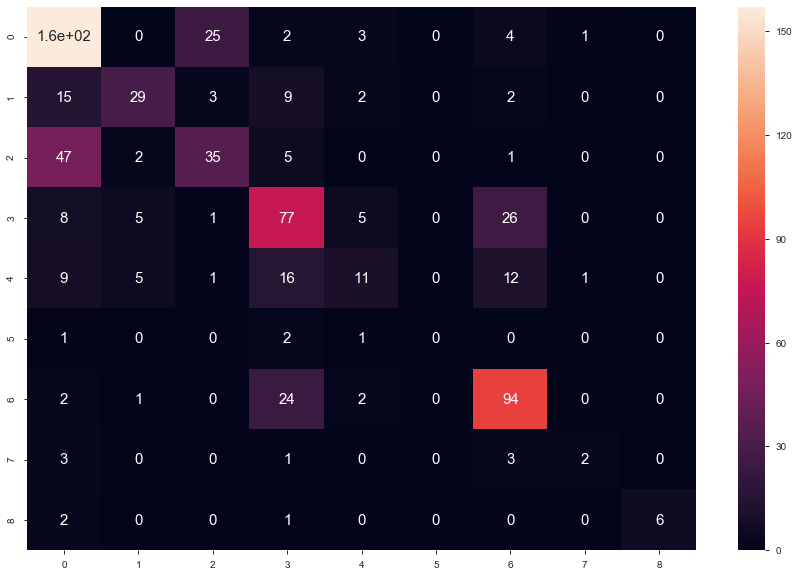

In [67]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print('\t\t Classification Report for Logistic Regression \n')
print('\t\t *** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')

y_predicted = cal_clf_bow_test.predict(X_test_bow)

#lets make a confusion matrix to view our real data (y_test) and predicted data (y_predicted)
cm = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot = True, ax=ax, annot_kws={"size": 15})

#lets make a classification report.
print(classification_report(y_test, y_predicted))

## 11.2. Set-2: preprocessed_medical_text (TFIDF) + categorical feature (GENE) + categorical feature (VARIATION)

<a id='lrset2'></a>

In [33]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

c = [0.001, 0.01, 0.1, 1, 10, 100] 

test_log_error_array = []

print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')
print('***Logloss while training with Logistic Regression*** \n')

for i in c:
    print("For 'C' =", i)
    model_lr_tfidf = LogisticRegression(C=i, class_weight='balanced')
    model_lr_tfidf.fit(X_train_tfidf, y_train)
    
    cal_clf_tfidf = CalibratedClassifierCV(model_lr_tfidf)
    cal_clf_tfidf.fit(X_train_tfidf, y_train)
    
    cal_clf_tfidf_probs = cal_clf_tfidf.predict_proba(X_test_tfidf)
    
    test_log_error_array.append(log_loss(y_test, cal_clf_tfidf_probs, labels=model_lr_tfidf.classes_))
    
    print("Log Loss :", log_loss(y_test, cal_clf_tfidf_probs)) 

*** Set 2 (TFIDF Encoding of Medical Text)*** 

***Logloss while training with Logistic Regression*** 

For 'C' = 0.001
Log Loss : 1.3393823483964387
For 'C' = 0.01
Log Loss : 1.1539846710739565
For 'C' = 0.1
Log Loss : 1.0548750855654399
For 'C' = 1
Log Loss : 0.9370292194502696
For 'C' = 10
Log Loss : 0.9005035032742718
For 'C' = 100
Log Loss : 0.9003351781195768
Wall time: 3min 46s


In [34]:
%%time

best_C = 10

clf_lr_tfidf = LogisticRegression(C=best_C, class_weight='balanced')
clf_lr_tfidf.fit(X_train_tfidf, y_train)

cal_clf_tfidf_test = CalibratedClassifierCV(clf_lr_tfidf)
cal_clf_tfidf_test.fit(X_train_tfidf, y_train)
cal_clf_lr_tfidf_probs = clf_lr_tfidf.predict_proba(X_test_tfidf)

print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')
print('***Logloss while testing with Logistic Regression*** \n')
print("Log Loss :", log_loss(y_test, cal_clf_lr_tfidf_probs))

*** Set 2 (TFIDF Encoding of Medical Text)*** 

***Logloss while testing with Logistic Regression*** 

Log Loss : 0.8909261668025468
Wall time: 58 s


In [42]:
print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')
print('***Analyzing the acutal and predicted class by taking a test datapoint*** \n')

test_datapoint_index = 210
predicted_cls = cal_clf_tfidf_test.predict(X_test_tfidf[test_datapoint_index])

print("Predicted Class :", predicted_cls[0])

#flatten because it gave a 2D array. Needs to be converted to 1D
predicted_prob = cal_clf_tfidf_test.predict_proba(X_test_tfidf[test_datapoint_index]).flatten()

print("Predicted Class Probabilities:", predicted_prob)
print("Actual Class :", y_test[test_datapoint_index])

print('*'*50)

print(cal_clf_tfidf_test.classes_[0], predicted_prob[0])
print(cal_clf_tfidf_test.classes_[1], predicted_prob[1])
print(cal_clf_tfidf_test.classes_[2], predicted_prob[2])
print(cal_clf_tfidf_test.classes_[3], predicted_prob[3])
print(cal_clf_tfidf_test.classes_[4], predicted_prob[4])
print(cal_clf_tfidf_test.classes_[5], predicted_prob[5])
print(cal_clf_tfidf_test.classes_[6], predicted_prob[6])
print(cal_clf_tfidf_test.classes_[7], predicted_prob[7])
print(cal_clf_tfidf_test.classes_[8], predicted_prob[8])

*** Set 2 (TFIDF Encoding of Medical Text)*** 

***Analyzing the acutal and predicted class by taking a test datapoint*** 

Predicted Class : Gain-of-function
Predicted Class Probabilities: [0.83737971 0.00794767 0.03931815 0.03339571 0.01037547 0.00333357
 0.01776173 0.04786815 0.00261983]
Actual Class : Gain-of-function
**************************************************
Gain-of-function 0.8373797096282
Inconclusive 0.007947669827953124
Likely Gain-of-function 0.039318146063466834
Likely Loss-of-function 0.03339571483498945
Likely Neutral 0.010375474459190903
Likely Switch-of-function 0.0033335714500530218
Loss-of-function 0.017761726959657245
Neutral 0.04786815461489305
Switch-of-function 0.002619832161596459


		 Classification Report for Logistic Regression 

		 *** Set 2 (TFIDF Encoding of Medical Text)*** 

                           precision    recall  f1-score   support

         Gain-of-function       0.69      0.88      0.78       207
             Inconclusive       0.68      0.56      0.61        54
  Likely Gain-of-function       0.67      0.55      0.60        93
  Likely Loss-of-function       0.63      0.68      0.66       107
           Likely Neutral       0.45      0.27      0.34        52
Likely Switch-of-function       0.00      0.00      0.00         2
         Loss-of-function       0.74      0.75      0.74       123
                  Neutral       0.33      0.05      0.09        19
       Switch-of-function       0.67      0.86      0.75         7

                 accuracy                           0.68       664
                macro avg       0.54      0.51      0.51       664
             weighted avg       0.66      0.68      0.66       664



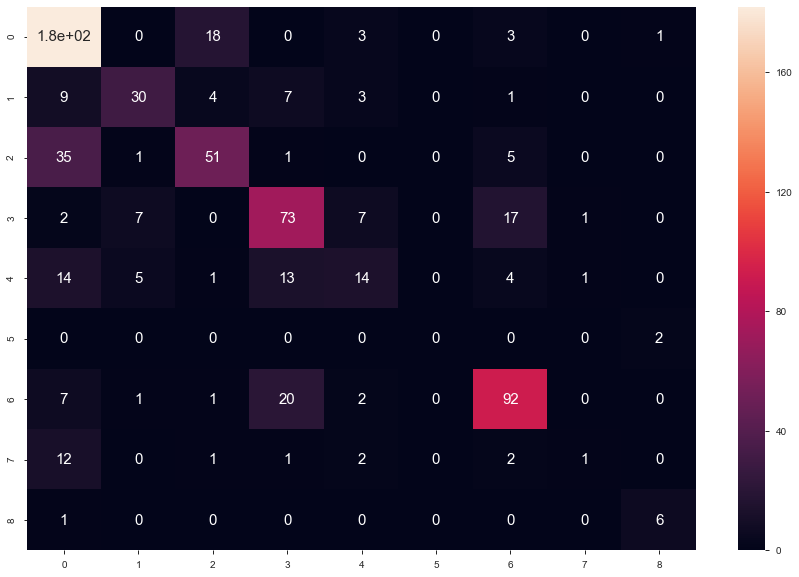

In [80]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

y_predicted = cal_clf_tfidf_test.predict(X_test_tfidf)

print('\t\t Classification Report for Logistic Regression \n')
print('\t\t *** Set 2 (TFIDF Encoding of Medical Text)*** \n')

#lets make a confusion matrix to view our real data (y_test) and predicted data (y_predicted)
cm = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot = True, ax=ax, annot_kws={"size": 15})

#lets make a classification report.
print(classification_report(y_test, y_predicted))

# 12. Applying Random Forest

<a id='rf'></a>

## 12.1. Set-1: preprocessed_medical_text (BoW) + categorical feature (GENE) + categorical feature (VARIATION)

<a id='rfset1'></a>

In [43]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

estimators = [5, 10, 50, 100, 200, 500]
#max_d = [2, 3, 4, 5, 6, 7, 8, 9, 10]

test_log_error_array = []

print('*** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')
print('***Logloss while training with Random Forest Classifier*** \n')

for i in estimators:
    print("For 'estimator' =", i)
    model_rf_bow = RandomForestClassifier(n_estimators=i, class_weight='balanced', max_depth=7, n_jobs=-1)
    model_rf_bow.fit(X_train_tfidf, y_train)
    
    cal_clf_bow = CalibratedClassifierCV(model_rf_bow)
    cal_clf_bow.fit(X_train_bow, y_train)
    
    cal_clf_bow_probs = cal_clf_bow.predict_proba(X_test_bow)
    
    test_log_error_array.append(log_loss(y_test, cal_clf_bow_probs, labels=model_rf_bow.classes_))
    
    print("Log Loss :", log_loss(y_test, cal_clf_bow_probs)) 

*** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

***Logloss while training with Random Forest Classifier*** 

For 'estimator' = 5
Log Loss : 1.5234007044065911
For 'estimator' = 10
Log Loss : 1.4311151863096407
For 'estimator' = 50
Log Loss : 1.3155420774409563
For 'estimator' = 100
Log Loss : 1.2436900619069173
For 'estimator' = 200
Log Loss : 1.241247583347346
For 'estimator' = 500
Log Loss : 1.2182451385481197
Wall time: 1min 30s


In [45]:
%%time

best_n_estimator = 500

clf_rf_bow = RandomForestClassifier(n_estimators=500, max_depth=7, class_weight='balanced')
clf_rf_bow.fit(X_train_bow, y_train)

cal_clf_bow_test = CalibratedClassifierCV(clf_rf_bow)
cal_clf_bow_test.fit(X_train_bow, y_train)
cal_clf_rf_bow_probs = clf_rf_bow.predict_proba(X_test_bow)

print('*** Set 1 (Bag-of-words Encoding of Medical Text)*** \n')
print('***Logloss while testing with Random Forest Classifier*** \n')

print("Log Loss :", log_loss(y_test, cal_clf_rf_bow_probs))

*** Set 1 (Bag-of-words Encoding of Medical Text)*** 

***Logloss while testing with Random Forest Classifier*** 

Log Loss : 1.7113826640615581
Wall time: 58.7 s


In [62]:
print('*** Set 1 of Random Forest (Bag-of-Words Encoding of Medical Text)*** \n')
print('***Analyzing the acutal and predicted class by taking a test datapoint*** \n')

test_datapoint_index = 417
predicted_cls = cal_clf_bow_test.predict(X_test_bow[test_datapoint_index])

print("Predicted Class :", predicted_cls[0])

#flatten because it gave a 2D array. Needs to be converted to 1D
predicted_prob = cal_clf_bow_test.predict_proba(X_test_bow[test_datapoint_index]).flatten()

print("Predicted Class Probabilities:", predicted_prob)
print("Actual Class :", y_test[test_datapoint_index])

print('*'*50)

print(cal_clf_bow_test.classes_[0], predicted_prob[0])
print(cal_clf_bow_test.classes_[1], predicted_prob[1])
print(cal_clf_bow_test.classes_[2], predicted_prob[2])
print(cal_clf_bow_test.classes_[3], predicted_prob[3])
print(cal_clf_bow_test.classes_[4], predicted_prob[4])
print(cal_clf_bow_test.classes_[5], predicted_prob[5])
print(cal_clf_bow_test.classes_[6], predicted_prob[6])
print(cal_clf_bow_test.classes_[7], predicted_prob[7])
print(cal_clf_bow_test.classes_[8], predicted_prob[8])

*** Set 1 of Random Forest (Bag-of-Words Encoding of Medical Text)*** 

***Analyzing the acutal and predicted class by taking a test datapoint*** 

Predicted Class : Likely Neutral
Predicted Class Probabilities: [0.01674898 0.03513716 0.0027166  0.33143667 0.55658768 0.00456423
 0.03807265 0.01088855 0.00384748]
Actual Class : Likely Loss-of-function
**************************************************
Gain-of-function 0.016748977601276974
Inconclusive 0.035137161269288446
Likely Gain-of-function 0.002716598412316937
Likely Loss-of-function 0.3314366691441603
Likely Neutral 0.5565876800018209
Likely Switch-of-function 0.004564226830913097
Loss-of-function 0.03807264961406449
Neutral 0.01088855391150848
Switch-of-function 0.0038474832146504095


		 Classification Report for Random Forest Classifier 

		 *** Set 1 (Bag-of-Words Encoding of Medical Text)*** 

                           precision    recall  f1-score   support

         Gain-of-function       0.60      0.91      0.72       202
             Inconclusive       0.82      0.48      0.61        56
  Likely Gain-of-function       0.64      0.24      0.34        89
  Likely Loss-of-function       0.63      0.49      0.55       120
           Likely Neutral       0.39      0.23      0.29        40
Likely Switch-of-function       0.00      0.00      0.00         4
         Loss-of-function       0.61      0.75      0.67       130
                  Neutral       0.50      0.29      0.37        17
       Switch-of-function       1.00      1.00      1.00         6

                 accuracy                           0.61       664
                macro avg       0.58      0.49      0.51       664
             weighted avg       0.62      0.61      0.58       664



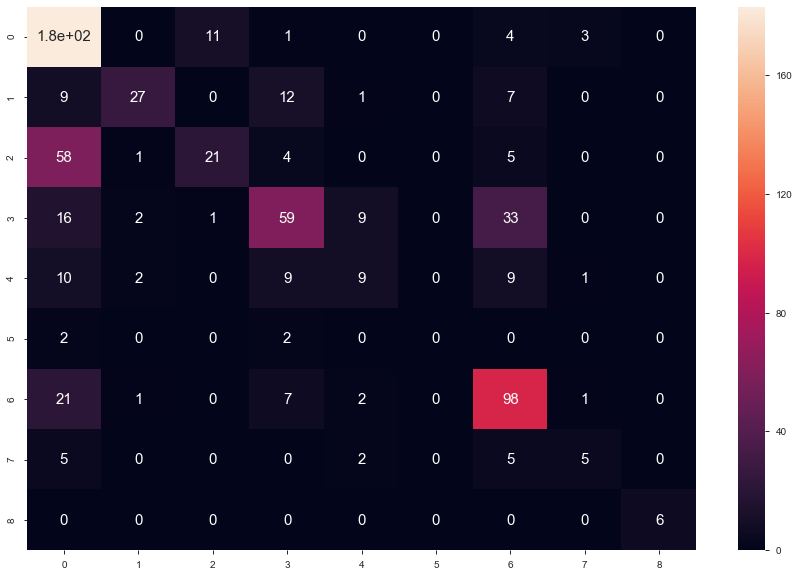

In [50]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

y_predicted = cal_clf_bow_test.predict(X_test_bow)

print('\t\t Classification Report for Random Forest Classifier \n')
print('\t\t *** Set 1 (Bag-of-Words Encoding of Medical Text)*** \n')

#lets make a confusion matrix to view our real data (y_test) and predicted data (y_predicted)
cm = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot = True, ax=ax, annot_kws={"size": 15})

#lets make a classification report.
print(classification_report(y_test, y_predicted))

## 12.2. Set-2: preprocessed_medical_text (TFIDF) + categorical feature (GENE) + categorical feature (VARIATION)

<a id='rfset2'></a>

In [53]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

estimators = [5, 10, 50, 100, 200, 500]

test_log_error_array = []

print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')
print('***Logloss while training with Random Forest Classifier*** \n')

for i in estimators:
    print("For 'estimator' =", i)
    model_rf_tfidf = RandomForestClassifier(n_estimators=i, class_weight='balanced', max_depth=7, n_jobs=-1)
    model_rf_tfidf.fit(X_train_tfidf, y_train)
    
    cal_clf_tfidf = CalibratedClassifierCV(model_rf_tfidf)
    cal_clf_tfidf.fit(X_train_tfidf, y_train)
    
    cal_clf_tfidf_probs = cal_clf_tfidf.predict_proba(X_test_tfidf)
    
    test_log_error_array.append(log_loss(y_test, cal_clf_tfidf_probs, labels=model_rf_tfidf.classes_))
    
    print("Log Loss :", log_loss(y_test, cal_clf_tfidf_probs))

*** Set 2 (TFIDF Encoding of Medical Text)*** 

***Logloss while training with Random Forest Classifier*** 

For 'estimator' = 5
Log Loss : 1.5188676079006391
For 'estimator' = 10
Log Loss : 1.398920040221349
For 'estimator' = 50
Log Loss : 1.247739338174388
For 'estimator' = 100
Log Loss : 1.1989008151332605
For 'estimator' = 200
Log Loss : 1.173384764904821
For 'estimator' = 500
Log Loss : 1.1584756894625041
Wall time: 1min 8s


In [55]:
%%time

best_n_estimator = 500

clf_lr_tfidf = RandomForestClassifier(n_estimators=best_n_estimator, max_depth=7, class_weight='balanced')
clf_lr_tfidf.fit(X_train_tfidf, y_train)

cal_clf_tfidf_test = CalibratedClassifierCV(clf_lr_tfidf)
cal_clf_tfidf_test.fit(X_train_tfidf, y_train)
cal_clf_lr_tfidf_probs = clf_lr_tfidf.predict_proba(X_test_tfidf)

print('*** Set 2 (TFIDF Encoding of Medical Text)*** \n')
print('***Logloss while testing with Random Forest Classifier*** \n')

print("Log Loss :", log_loss(y_test, cal_clf_lr_tfidf_probs))

*** Set 2 (TFIDF Encoding of Medical Text)*** 

***Logloss while testing with Random Forest Classifier*** 

Log Loss : 1.7226928802276962
Wall time: 1min 17s


In [60]:
print('*** Set 2 of Random Forest (TFIDF Encoding of Medical Text)*** \n')
print('***Analyzing the acutal and predicted class by taking a test datapoint*** \n')

test_datapoint_index = 365
predicted_cls = cal_clf_tfidf_test.predict(X_test_tfidf[test_datapoint_index])

print("Predicted Class :", predicted_cls[0])

#flatten because it gave a 2D array. Needs to be converted to 1D
predicted_prob = cal_clf_tfidf_test.predict_proba(X_test_tfidf[test_datapoint_index]).flatten()

print("Predicted Class Probabilities:", predicted_prob)
print("Actual Class :", y_test[test_datapoint_index])

print('*'*50)

print(cal_clf_tfidf_test.classes_[0], predicted_prob[0])
print(cal_clf_tfidf_test.classes_[1], predicted_prob[1])
print(cal_clf_tfidf_test.classes_[2], predicted_prob[2])
print(cal_clf_tfidf_test.classes_[3], predicted_prob[3])
print(cal_clf_tfidf_test.classes_[4], predicted_prob[4])
print(cal_clf_tfidf_test.classes_[5], predicted_prob[5])
print(cal_clf_tfidf_test.classes_[6], predicted_prob[6])
print(cal_clf_tfidf_test.classes_[7], predicted_prob[7])
print(cal_clf_tfidf_test.classes_[8], predicted_prob[8])

*** Set 2 of Random Forest (TFIDF Encoding of Medical Text)*** 

***Analyzing the acutal and predicted class by taking a test datapoint*** 

Predicted Class : Inconclusive
Predicted Class Probabilities: [6.53567661e-04 9.44517537e-01 6.63689001e-04 4.03348163e-03
 3.37143537e-02 4.16355830e-03 2.60375112e-04 8.97331712e-03
 3.02012015e-03]
Actual Class : Likely Gain-of-function
**************************************************
Gain-of-function 0.0006535676608901006
Inconclusive 0.9445175373415226
Likely Gain-of-function 0.000663689000583376
Likely Loss-of-function 0.0040334816289371
Likely Neutral 0.033714353687646074
Likely Switch-of-function 0.004163558300783133
Loss-of-function 0.00026037511172404644
Neutral 0.008973317118927973
Switch-of-function 0.0030201201489857446


		 Classification Report for Logistic Regression 

		 *** Set 2 (TFIDF Encoding of Medical Text)*** 

                           precision    recall  f1-score   support

         Gain-of-function       0.61      0.95      0.75       202
             Inconclusive       0.89      0.43      0.58        56
  Likely Gain-of-function       0.75      0.20      0.32        89
  Likely Loss-of-function       0.65      0.47      0.54       120
           Likely Neutral       0.43      0.25      0.32        40
Likely Switch-of-function       0.00      0.00      0.00         4
         Loss-of-function       0.57      0.78      0.66       130
                  Neutral       0.50      0.24      0.32        17
       Switch-of-function       1.00      1.00      1.00         6

                 accuracy                           0.62       664
                macro avg       0.60      0.48      0.50       664
             weighted avg       0.64      0.62      0.58       664



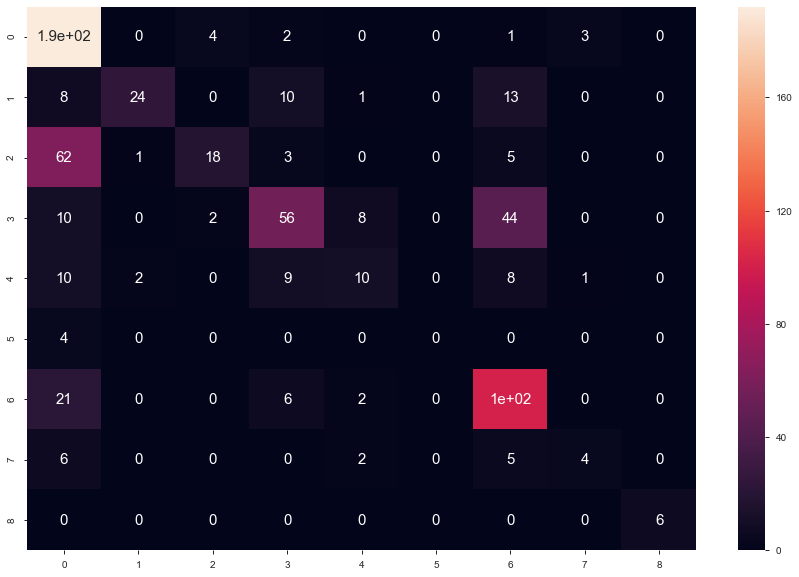

In [61]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

y_predicted = cal_clf_tfidf_test.predict(X_test_tfidf)

print('\t\t Classification Report for Logistic Regression \n')
print('\t\t *** Set 2 (TFIDF Encoding of Medical Text)*** \n')

#lets make a confusion matrix to view our real data (y_test) and predicted data (y_predicted)
cm = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot = True, ax=ax, annot_kws={"size": 15})

#lets make a classification report.
print(classification_report(y_test, y_predicted))

# 13. Conclusions
<a id='con'></a>

## Result summarization for Log-Loss  

In [31]:
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Algorithm", "Encoding", "Minimum log-loss while training", "Log-loss obtained after testing"]

x.add_row(["Naive Bayes", "Bag of Words", 1.26 , 1.77])
x.add_row(["Naive Bayes", "TF-IDF", 1.11 , 1.24 ])
x.add_row(["k-NN (Nearest Neighbors)", "Bag of Words", 1.21 , 2.89 ])
x.add_row(["k-NN (Nearest Neighbors)", "TF-IDF", 1.12 , 2.76 ])
x.add_row(["Logistic Regression", "Bag of Words", 1.15 , 1.37 ])
x.add_row(["Logistic Regression", "TF-IDF", 0.90 , 0.89 ])
x.add_row(["Random Forest", "Bag of Words", 1.21 , 1.71 ])
x.add_row(["Random Forest", "TF-IDF", 1.15 , 1.72 ])

print(x)

+--------------------------+--------------+---------------------------------+---------------------------------+
|        Algorithm         |   Encoding   | Minimum log-loss while training | Log-loss obtained after testing |
+--------------------------+--------------+---------------------------------+---------------------------------+
|       Naive Bayes        | Bag of Words |               1.26              |               1.77              |
|       Naive Bayes        |    TF-IDF    |               1.11              |               1.24              |
| k-NN (Nearest Neighbors) | Bag of Words |               1.21              |               2.89              |
| k-NN (Nearest Neighbors) |    TF-IDF    |               1.12              |               2.76              |
|   Logistic Regression    | Bag of Words |               1.15              |               1.37              |
|   Logistic Regression    |    TF-IDF    |               0.9               |               0.89        

## Result summarization for Accuracy

In [5]:
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Algorithm", "Encoding", "Accuracy (in %)"]

x.add_row(["Naive Bayes", "Bag of Words", 63])
x.add_row(["Naive Bayes", "TF-IDF", 65])
x.add_row(["k-NN (Nearest Neighbors)", "Bag of Words", 58])
x.add_row(["k-NN (Nearest Neighbors)", "TF-IDF", 62])
x.add_row(["Logistic Regression", "Bag of Words", 62])
x.add_row(["Logistic Regression", "TF-IDF", 68])
x.add_row(["Random Forest", "Bag of Words", 61])
x.add_row(["Random Forest", "TF-IDF", 62])

print(x)

+--------------------------+--------------+-----------------+
|        Algorithm         |   Encoding   | Accuracy (in %) |
+--------------------------+--------------+-----------------+
|       Naive Bayes        | Bag of Words |        63       |
|       Naive Bayes        |    TF-IDF    |        65       |
| k-NN (Nearest Neighbors) | Bag of Words |        58       |
| k-NN (Nearest Neighbors) |    TF-IDF    |        62       |
|   Logistic Regression    | Bag of Words |        62       |
|   Logistic Regression    |    TF-IDF    |        68       |
|      Random Forest       | Bag of Words |        61       |
|      Random Forest       |    TF-IDF    |        62       |
+--------------------------+--------------+-----------------+


# Reference for deployment

In [ ]:
##https://stackoverflow.com/questions/1987694/how-to-print-the-full-numpy-array-without-truncation
##https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/

final_df.Gene.unique()
#For getting the whole array without truncating.

import sys
np.set_printoptions(threshold=sys.maxsize)
final_df.Variation.unique()

In [4]:
def add():
    pred = 1
    pred_prob = 2
    prediction = (pred, pred_prob)
    return prediction

add()

(1, 2)